In [2]:
# отключим ворнинги
import warnings
warnings.filterwarnings('ignore')

# импорт библиотек

from datetime import datetime
from fbprophet import Prophet
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

# настройка размеров графиков
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 8)

# настройка стиля графиков
sns.set(style="whitegrid", palette="pastel", color_codes=True)

Populating the interactive namespace from numpy and matplotlib


In [3]:
# чтение данных

covid = pd.read_csv('data/complete_data_new_format.csv', sep=',')
covid['Date'] = pd.to_datetime(covid['Date'], infer_datetime_format=True)

# оставим только Россию
data = covid[(covid['Country/Region']=='Russia') & (covid['Confirmed'] > 0)].reset_index()
data.tail()

,index,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths
50,14583,NaN,Russia,60.0,90.0,2020-03-21,306,1
51,14827,NaN,Russia,60.0,90.0,2020-03-22,367,1
52,15071,NaN,Russia,60.0,90.0,2020-03-23,438,1
53,15315,NaN,Russia,60.0,90.0,2020-03-24,495,1
54,15559,NaN,Russia,60.0,90.0,2020-03-25,658,3


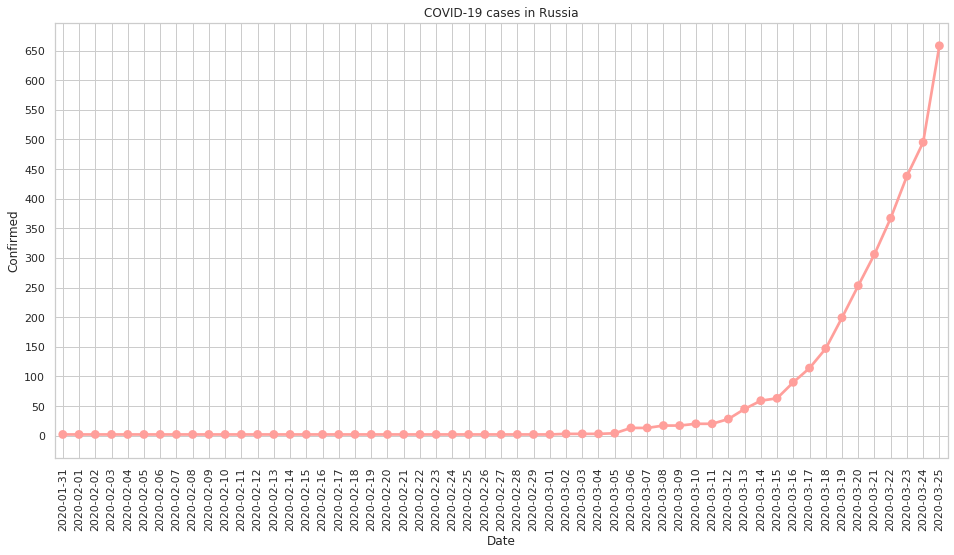

In [8]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', color='r', y_tick_step=50):
    fig, ax = plt.subplots() 
    sns.pointplot(x=df[x].dt.date, y=df[y], color=color)
    plt.yticks(np.arange(0, np.max(df[y]), y_tick_step))
    plt.xticks(rotation=90)
    plt.title(title)
    ax.yaxis.grid(True)
    ax.xaxis.grid(True)
    plt.show()

# график до 25 марта
plot_df(df=data, x='Date', y='Confirmed', title='COVID-19 cases in Russia');

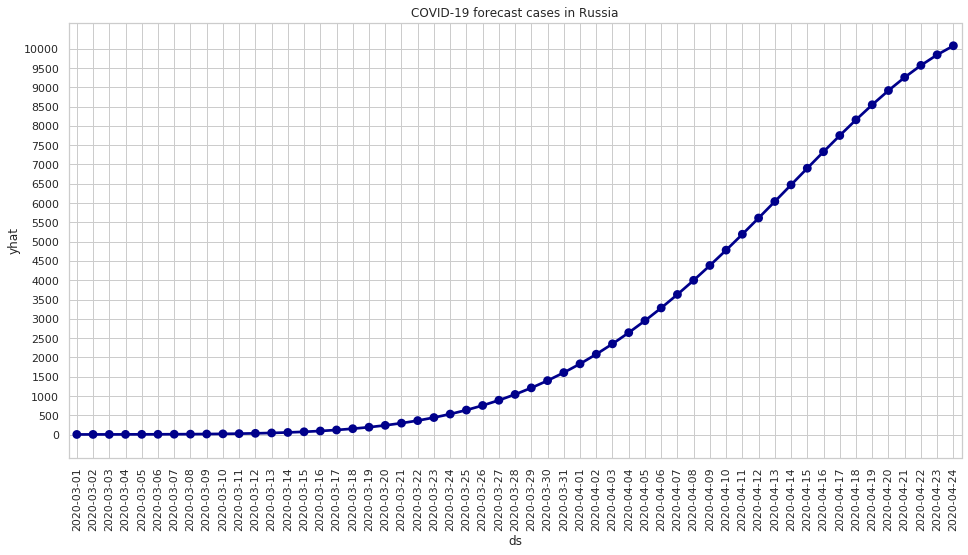

In [11]:
# готовим данные для модели

df = data[['Date', 'Confirmed']]
df['Confirmed'] = df['Confirmed']
df.rename(columns={'Date':'ds', 'Confirmed':'y'}, inplace=True)

# обучаем модель
model = Prophet(changepoint_range=0.5,
                yearly_seasonality=True,
                weekly_seasonality=False,
                daily_seasonality=False)
model.fit(df)

# прогноз на 30 дней
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)
forecast['yhat'] = forecast['yhat'].map(int)

plot_df(df=forecast[forecast['ds']>=datetime.date(2020,3, 1)],
        x='ds', y='yhat',
        title='COVID-19 forecast cases in Russia',color='darkblue', y_tick_step=500);